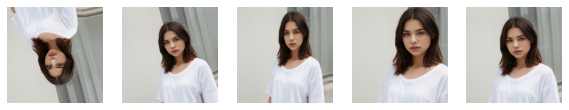

In [41]:
#KERAS İLE VERİ ARTTIRMA 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Veri artırma parametrelerini tanımla
datagen = ImageDataGenerator( 
    rotation_range= 20 , 
    width_shift_range= 0.1 , 
    height_shift_range= 0.1 , 
    shear_range= 0.2 , 
    zoom_range= 0.2 , 
    horizontal_flip= True , 
    vertical_flip= True , 
    fill_mode= 'nearest'
 ) 

# Orijinal görüntüyü yükle
img = load_img( '00085-3925358014.png' ) 
img = img_to_array(img)  # Görüntüyü numpy dizisine dönüştür
# Görüntüyü (1, height, width, channels) şeklinde 4 boyutlu bir tensöre yeniden şekillendir
img = img.reshape(( 1 ,) + img.shape) 

# Artırılmış görüntüler oluştur
augmented_images = [] 
for batch in datagen.flow(img, batch_size= 1 ): 
    augmented_images.append(batch[ 0 ]) 
    if  len (augmented_images) >= 5 : 
        break   # 5 artırılmış görüntü oluşturduktan sonra döngüyü durdur # i, img için 

        
# Orijinal ve artırılmış görüntüleri görüntüle
plt.figure(figsize=(12, 6))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 6, i + 1)
    plt.imshow(img.astype('uint8'))
    plt.axis('off')

plt.show()

In [42]:
#PIL kütüphanesi ile görseli 45 derece DÖNDÜRME İŞLEMİ
from PIL import Image
import os


input_folder = 'Images'
output_folder = 'Rotated'

os.makedirs(output_folder, exist_ok=True)

# Klasördeki tüm dosyaları döndürme işlemi
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Görsel dosya uzantılarını filtreleme
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        
        # Görseli 45 derece döndür
        rotated_img = img.rotate(45)
        
        # Döndürülen görseli çıktı klasörüne kaydetme
        output_path = os.path.join(output_folder, f'rotated_{filename}')
        rotated_img.save(output_path)

print(f"Tüm görseller {output_folder} klasörüne kaydedildi.")

Tüm görseller Rotated klasörüne kaydedildi.


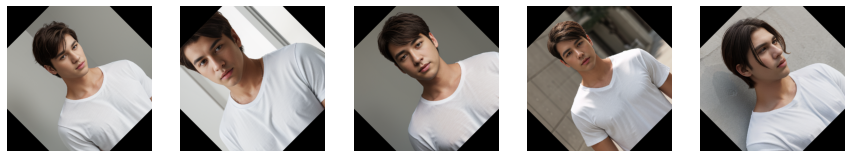

In [43]:
# Görüntülenecek maksimum görsel sayısı
max_images_to_display = 5

# Çıktı klasöründeki döndürülen görselleri görüntüleme

images = []
for idx, filename in enumerate(os.listdir(output_folder)):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(output_folder, filename)
        img = Image.open(img_path)
        images.append(img)
        
        if idx >= max_images_to_display - 1:
            break

# Görselleri bir arada gösterme
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [44]:
#Görselleri yatay veya dikey olarak çevirme PIl ın transpose fonksiyonu
from PIL import Image, ImageOps
import os
# Klasördeki tüm dosyaları çevirme işlemi
input_folder = 'Images'
output_folder = 'Flipped'

for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Görsel dosya uzantılarını filtreleme
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        
        # Yatay olarak çevirme
        flipped_horizontal = ImageOps.mirror(img)
        flipped_horizontal.save(os.path.join(output_folder, f'flipped_horizontal_{filename}'))
        
        # Dikey olarak çevirme
        flipped_vertical = ImageOps.flip(img)
        flipped_vertical.save(os.path.join(output_folder, f'flipped_vertical_{filename}'))

print(f"Tüm görseller {output_folder} klasörüne yatay ve dikey olarak çevrilmiş olarak kaydedildi.")



Tüm görseller Flipped klasörüne yatay ve dikey olarak çevrilmiş olarak kaydedildi.


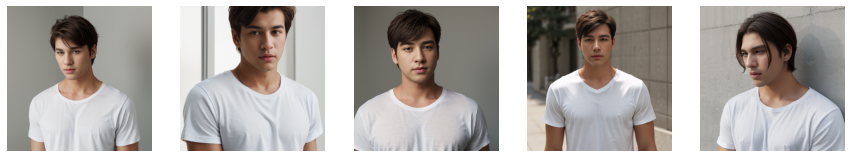

In [45]:
images = []
for idx, filename in enumerate(os.listdir(output_folder)):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(output_folder, filename)
        img = Image.open(img_path)
        images.append(img)
        
        if idx >= max_images_to_display - 1:
            break

# Görselleri bir arada gösterme
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [48]:
from PIL import Image
import numpy as np
import os

input_folder = 'Images'
output_folder = 'Zoom'


os.makedirs(output_folder, exist_ok=True)

def zoom_image(img, zoom_factor):
   
    width, height = img.size
    new_width = int(width * zoom_factor)
    new_height = int(height * zoom_factor)
    
    # Görseli yeniden boyutlandır
    img_resized = img.resize((new_width, new_height), Image.LANCZOS)
    
    # Merkezden kesme işlemi
    left = (new_width - width) / 2
    top = (new_height - height) / 2
    right = (new_width + width) / 2
    bottom = (new_height + height) / 2
    
    img_cropped = img_resized.crop((left, top, right, bottom))
    
    return img_cropped

# Klasördeki tüm dosyaları yakınlaştırma işlemi
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Görsel dosya uzantılarını filtreleme
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        
        # Yakınlaştırma faktörü (1.0 orijinal boyut, 1.5 %50 yakınlaştırma, vs.)
        zoom_factor = 1.5
        
        # Görseli yakınlaştırma
        zoomed_img = zoom_image(img, zoom_factor)
        
        # Yakınlaştırılmış görseli çıktı klasörüne kaydetme
        zoomed_img.save(os.path.join(output_folder, f'zoomed_{filename}'))

print(f"Tüm görseller {output_folder} klasörüne yakınlaştırılmış olarak kaydedildi.")


Tüm görseller Zoom klasörüne yakınlaştırılmış olarak kaydedildi.


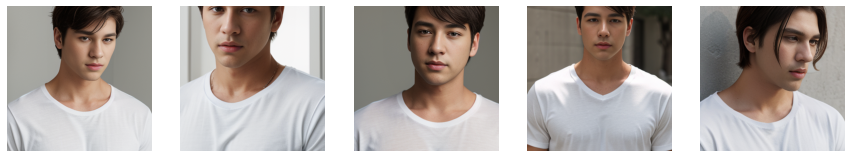

In [49]:
images = []
for idx, filename in enumerate(os.listdir(output_folder)):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(output_folder, filename)
        img = Image.open(img_path)
        images.append(img)
        
        if idx >= max_images_to_display - 1:
            break

# Görselleri bir arada gösterme
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')
plt.show()